In [82]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
# For timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [84]:
# Import Kera:TimeSeriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import Keras:MinMax Scalar

from sklearn.preprocessing import MinMaxScaler

In [85]:
dir_path_dataset_1 = 'GOOG_1.csv'

### Load Data

In [86]:
df_ALL = pd.read_csv(dir_path_dataset_1)
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [87]:
df_ALL.shape

(1382, 7)

In [88]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [89]:
# Statistic Summary

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,47.627746,48.066592,47.193521,47.650752,47.650752,3.479765e+07
std,12.790044,12.941852,12.666063,12.815438,12.815438,1.710484e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.950000e+06
25%,37.039625,37.255625,36.800625,37.042999,37.042999,2.456500e+07
50%,48.563249,48.886751,48.226500,48.628999,48.628999,3.040600e+07
75%,57.438376,58.337350,57.045499,57.691000,57.691000,3.960400e+07
max,76.253502,76.605301,76.070000,76.334503,76.334503,2.232980e+08


### Keep only close price and filter out all other attributes

In [90]:
df = df_ALL.iloc[:,4:5]

In [91]:
df.head()

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


<AxesSubplot:>

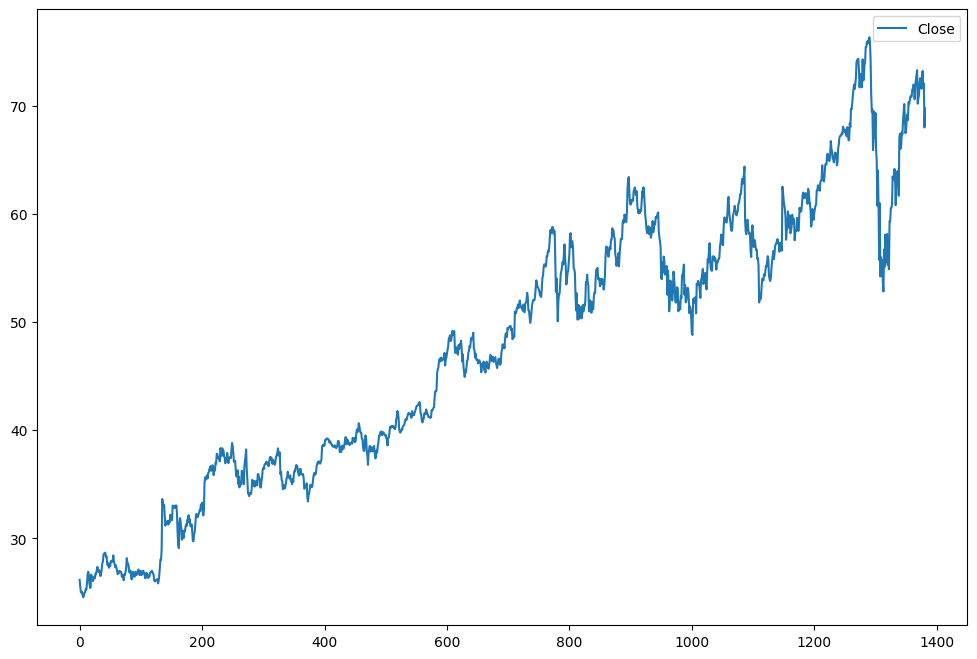

In [92]:
df.plot(figsize=(12,8))

### Length of input Time Series-Number of Input Time Steps

In [93]:
length60 = 61

In [94]:
length60

61

### Time Series Dataset: Train/ test split

In [95]:
len(df)

1382

In [96]:
# Set percentage of data used for testing

test_percent = 0.2

In [97]:
len(df)*test_percent

276.40000000000003

### Split Data -> Train/Test

In [98]:
test_length = np.round(len(df)*test_percent)
test_length

276.0

In [99]:
split_index = int(len(df)-test_length)

split_index

1106

In [100]:
data_train = df.iloc[:split_index]

In [101]:
data_test = df.iloc[split_index - length60:]

In [102]:
data_train.head(5)

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


In [103]:
data_train.tail()

,Close
1101,56.942501
1102,57.481499
1103,57.570999
1104,57.038502
1105,56.673500


In [104]:
data_test.head(5)

,Close
1045,55.995998
1046,57.049500
1047,57.389999
1048,58.101501
1049,57.893002


In [105]:
data_test.tail()

,Close
1377,73.220497
1378,71.598503
1379,72.066498
1380,67.995003
1381,69.748497


### Normalize Data in range [0, 1]

In [106]:
scaler = MinMaxScaler()

In [107]:
scaler.fit(data_train)

MinMaxScaler()

In [108]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [109]:
batch_size32 = 40

train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [110]:
len(normalized_train)

1106

In [111]:
len(train_tsGenerator60)

27

In [112]:
x,y = train_tsGenerator60[0]

In [113]:
x

array([[[0.04039745],
        [0.02669791],
        [0.01178364],
        ...,
        [0.0698628 ],
        [0.07448362],
        [0.06943708]],

       [[0.02669791],
        [0.01178364],
        [0.01070674],
        ...,
        [0.07448362],
        [0.06943708],
        [0.06262484]],

       [[0.01178364],
        [0.01070674],
        [0.01268527],
        ...,
        [0.06943708],
        [0.06262484],
        [0.05382154]],

       ...,

       [[0.07880383],
        [0.08246041],
        [0.09866451],
        ...,
        [0.06035896],
        [0.0644274 ],
        [0.06141378]],

       [[0.08246041],
        [0.09866451],
        [0.10154467],
        ...,
        [0.0644274 ],
        [0.06141378],
        [0.05163195]],

       [[0.09866451],
        [0.10154467],
        [0.10120654],
        ...,
        [0.06141378],
        [0.05163195],
        [0.06101194]]])

In [114]:
y

array([[0.06262484],
       [0.05382154],
       [0.05536807],
       [0.05568736],
       [0.06143518],
       [0.06039585],
       [0.05943161],
       [0.0583797 ],
       [0.047385  ],
       [0.05006478],
       [0.05165513],
       [0.03944576],
       [0.05363371],
       [0.05186807],
       [0.0586239 ],
       [0.06818481],
       [0.09080039],
       [0.08057547],
       [0.07845339],
       [0.07267725],
       [0.05793554],
       [0.0586387 ],
       [0.06225507],
       [0.04972336],
       [0.04146094],
       [0.04959777],
       [0.05904049],
       [0.05587619],
       [0.04751333],
       [0.04824166],
       [0.05926654],
       [0.05355315],
       [0.05160686],
       [0.05796063],
       [0.06035896],
       [0.0644274 ],
       [0.06141378],
       [0.05163195],
       [0.06101194],
       [0.06099938]])

### Build LSTM Model

In [115]:
n_features = 1

In [116]:
model = Sequential()
model.add(LSTM(60, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu'))
model.add(Dense(1))

### Compile model

In [117]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 61, 60)            14880     
                                                                 
 dropout_2 (Dropout)         (None, 61, 60)            0         
                                                                 
 lstm_4 (LSTM)               (None, 61, 60)            29040     
                                                                 
 dropout_3 (Dropout)         (None, 61, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60)                29040     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trai

### Train(Fit) Model using fit_generator()

In [118]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


27/27 [==============================] - 5s 66ms/step - loss: 0.1560
Epoch 2/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0105
Epoch 3/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0065
Epoch 4/100
27/27 [==============================] - 2s 66ms/step - loss: 0.0053
Epoch 5/100
27/27 [==============================] - 2s 66ms/step - loss: 0.0109
Epoch 6/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0123
Epoch 7/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0046
Epoch 8/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0044
Epoch 9/100
27/27 [==============================] - 2s 66ms/step - loss: 0.0043
Epoch 10/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0040
Epoch 11/100
27/27 [==============================] - 2s 66ms/step - loss: 0.0052
Epoch 12/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0031
Epoch 13/100
27/27 [=================

### Visualize model

In [119]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

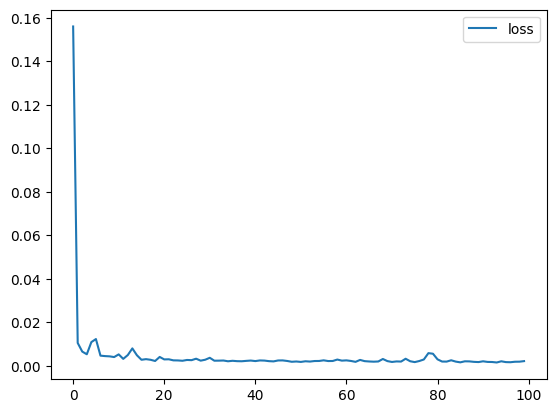

In [120]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediction for testing: Using TimeSeriesGenerator

In [121]:
batch_size1 = 1

In [76]:
test_tsGenerator61 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### Predict Future Data Points for Testing

In [77]:
normalized_prediction = model.predict(test_tsGenerator60)

276/276 [==============================] - 4s 12ms/step


In [78]:
normalized_prediction

array([[0.77462345],
       [0.772095  ],
       [0.7683899 ],
       [0.7640103 ],
       [0.7586643 ],
       [0.7493279 ],
       [0.7379589 ],
       [0.725463  ],
       [0.713117  ],
       [0.70282745],
       [0.69574803],
       [0.69164574],
       [0.68981266],
       [0.69017744],
       [0.69185024],
       [0.69454175],
       [0.6983478 ],
       [0.7027851 ],
       [0.7077478 ],
       [0.7133637 ],
       [0.71871334],
       [0.7215944 ],
       [0.7216995 ],
       [0.719495  ],
       [0.7162464 ],
       [0.713638  ],
       [0.7127023 ],
       [0.71403956],
       [0.71766216],
       [0.72178996],
       [0.7261608 ],
       [0.7312837 ],
       [0.736941  ],
       [0.742662  ],
       [0.74830574],
       [0.75370955],
       [0.75814027],
       [0.76145023],
       [0.7627094 ],
       [0.7627889 ],
       [0.76269996],
       [0.76220745],
       [0.7611138 ],
       [0.76433027],
       [0.77131236],
       [0.7804135 ],
       [0.7901    ],
       [0.799

In [79]:
len(normalized_prediction)

276

In [80]:
prediction = scaler.inverse_transform(normalized_prediction)

In [122]:
prediction_index = np.arange(1106, 1382, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index,columns=['Prediction'])

In [123]:
df_prediction

,Prediction
1106,55.404743
1107,55.304066
1108,55.156528
1109,54.982143
1110,54.769268
...,...
1377,65.416306
1378,65.505829
1379,65.568932
1380,65.617096


### Visualize Prediction

<AxesSubplot:>

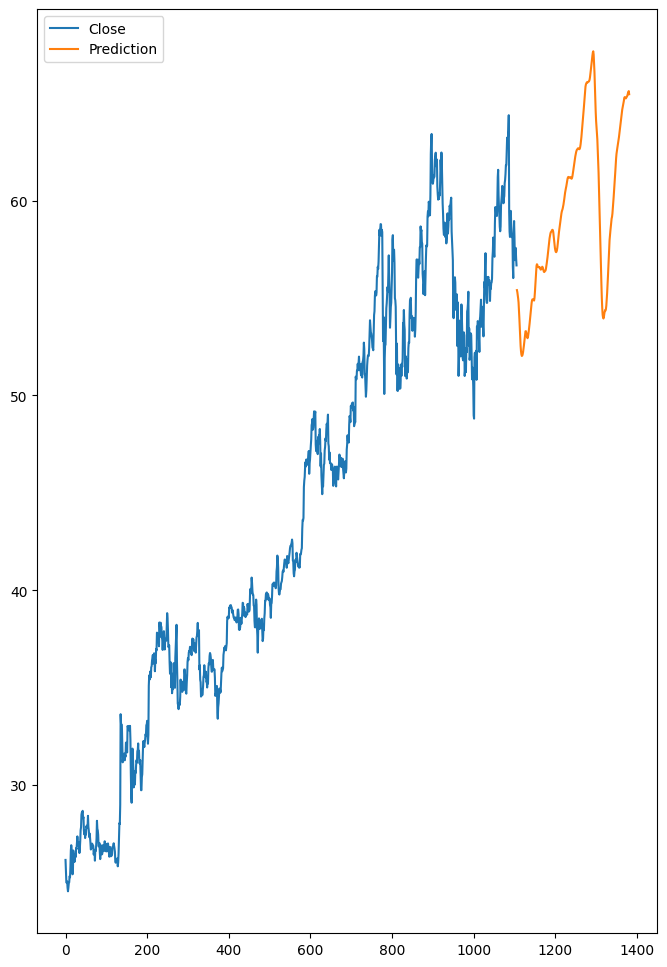

In [124]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

### visualize prediction and compare actual close price

<AxesSubplot:>

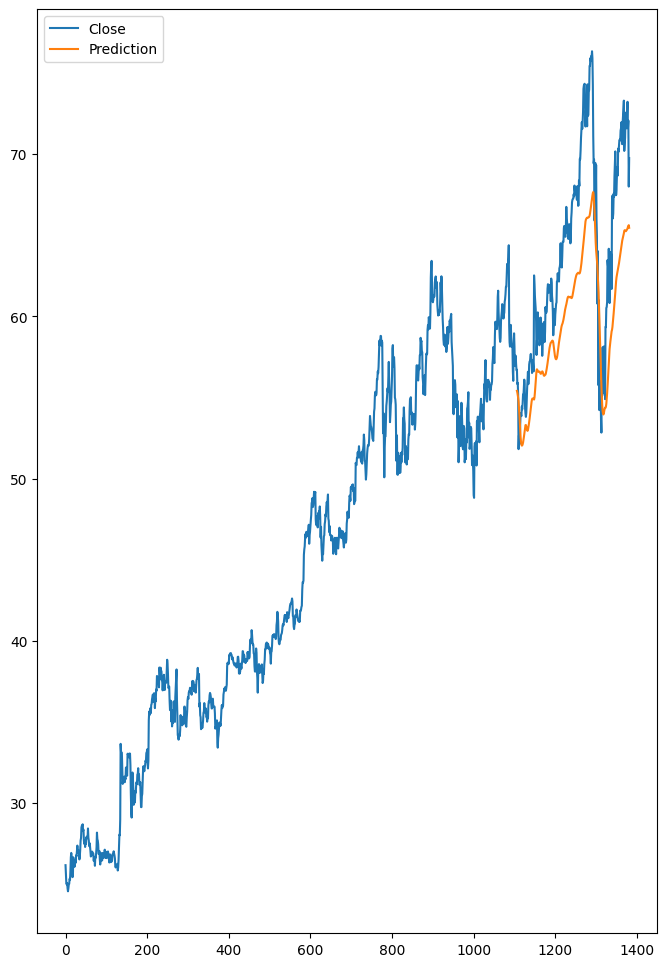

In [125]:
ax=df.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

### Time series data Forecasting with LSTM

In [126]:
full_scaler=MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

In [127]:
length60

61

In [128]:
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

### Build, Compile, and Fit LSTM Model for Forecasting

In [129]:
model.fit_generator(forecast_tsGenerator, epochs=100)

Epoch 1/100
 2/34 [>.............................] - ETA: 2s - loss: 9.6947e-04

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


34/34 [==============================] - 2s 68ms/step - loss: 0.0017
Epoch 2/100
34/34 [==============================] - 2s 67ms/step - loss: 0.0017
Epoch 3/100
34/34 [==============================] - 2s 66ms/step - loss: 0.0015
Epoch 4/100
34/34 [==============================] - 2s 66ms/step - loss: 0.0015
Epoch 5/100
34/34 [==============================] - 2s 67ms/step - loss: 0.0020
Epoch 6/100
34/34 [==============================] - 2s 66ms/step - loss: 0.0024
Epoch 7/100
34/34 [==============================] - 2s 67ms/step - loss: 0.0016
Epoch 8/100
34/34 [==============================] - 2s 67ms/step - loss: 0.0016
Epoch 9/100
34/34 [==============================] - 2s 66ms/step - loss: 0.0018
Epoch 10/100
34/34 [==============================] - 2s 65ms/step - loss: 0.0014
Epoch 11/100
34/34 [==============================] - 2s 66ms/step - loss: 0.0015
Epoch 12/100
34/34 [==============================] - 2s 67ms/step - loss: 0.0024
Epoch 13/100
34/34 [=================

In [130]:
forecast = []
periods = 106
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1,length60,n_features))
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [131]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[69.23390853],
       [68.660805  ],
       [68.23694953],
       [67.9139722 ],
       [67.66398796],
       [67.46765993],
       [67.30683939],
       [67.16893237],
       [67.04432291],
       [66.92606751],
       [66.80960817],
       [66.69238041],
       [66.57337204],
       [66.45265093],
       [66.330967  ],
       [66.20935404],
       [66.08895697],
       [65.97078798],
       [65.85564327],
       [65.74407523],
       [65.63641407],
       [65.53272766],
       [65.43296048],
       [65.33690575],
       [65.2443135 ],
       [65.15487206],
       [65.06828825],
       [64.98427508],
       [64.90259492],
       [64.82303175],
       [64.74540967],
       [64.66959599],
       [64.59548578],
       [64.52300189],
       [64.45206717],
       [64.38262916],
       [64.31464465],
       [64.24806736],
       [64.18286642],
       [64.11898629],
       [64.05640228],
       [63.99505575],
       [63.93490968],
       [63.87594245],
       [63.8180831 ],
       [63

In [132]:
df

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184
...,...
1377,73.220497
1378,71.598503
1379,72.066498
1380,67.995003


In [133]:
forecast_index=np.arange(1382,1488,step=1)


In [134]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [135]:
forecast_df

,Forecast
1382,69.233909
1383,68.660805
1384,68.236950
1385,67.913972
1386,67.663988
...,...
1483,61.571937
1484,61.542861
1485,61.513979
1486,61.485276


<AxesSubplot:>

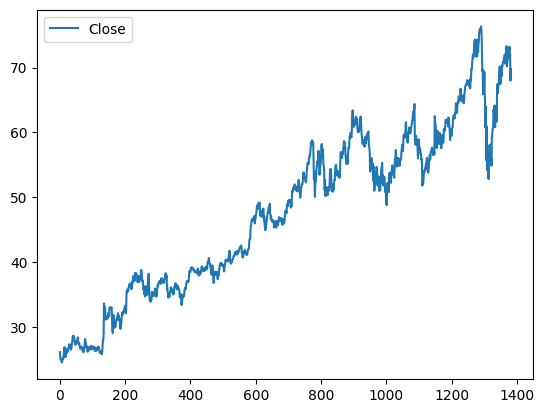

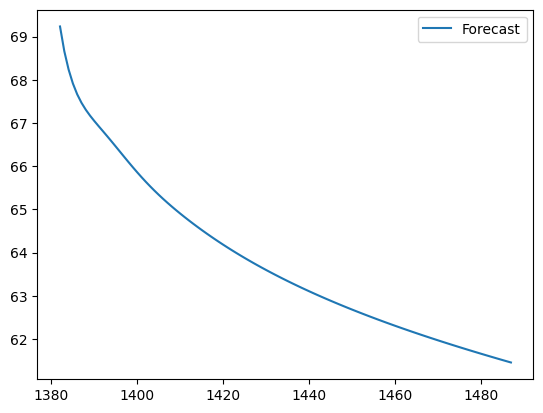

In [136]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

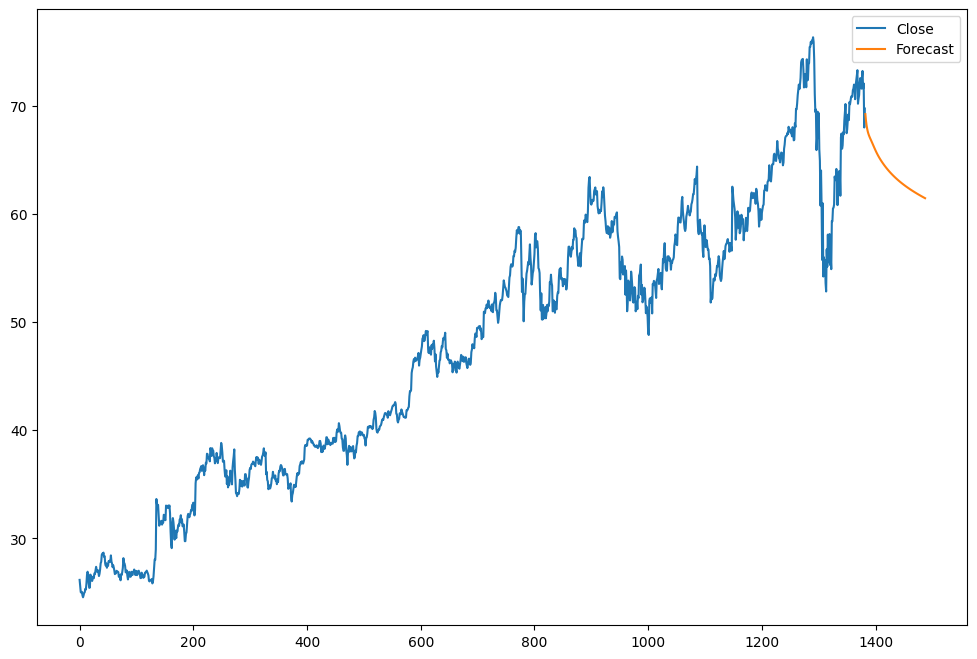

In [137]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [138]:
dir_path_dataset_2 = 'GOOG_2.csv'

In [139]:
df_ALL_JUL_DEC_2019 = pd.read_csv(dir_path_dataset_2)


In [140]:
df_ALL_JUL_DEC_2019

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-30,110.499496,111.329803,107.309998,109.372498,109.372498,38046000
1,2022-07-01,108.336998,109.806351,107.105003,109.081001,109.081001,31028000
2,2022-07-05,107.514503,114.052597,106.249496,113.887001,113.887001,36398000
3,2022-07-06,114.092003,116.351997,112.250504,115.213501,115.213501,28852000
4,2022-07-07,116.008003,119.862000,115.533997,119.306000,119.306000,32184000
...,...,...,...,...,...,...,...
101,2022-11-22,96.160004,97.547997,94.410004,97.330002,97.330002,18868900
102,2022-11-23,97.339996,99.069000,97.339996,98.820000,98.820000,17568900
103,2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
104,2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500


In [141]:
df_JUL_DEC_2019=df_ALL_JUL_DEC_2019.iloc[:,4:5]

In [142]:
df_JUL_DEC_2019

,Close
0,109.372498
1,109.081001
2,113.887001
3,115.213501
4,119.306000
...,...
101,97.330002
102,98.820000
103,97.599998
104,96.250000


<AxesSubplot:>

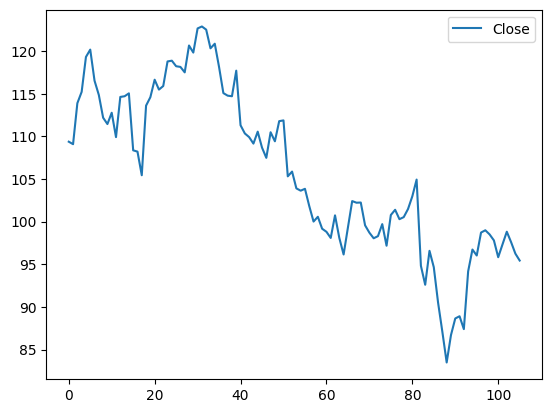

In [143]:
df_JUL_DEC_2019.plot()

In [144]:
forecast_df['Forecast'].values

array([69.23390853, 68.660805  , 68.23694953, 67.9139722 , 67.66398796,
       67.46765993, 67.30683939, 67.16893237, 67.04432291, 66.92606751,
       66.80960817, 66.69238041, 66.57337204, 66.45265093, 66.330967  ,
       66.20935404, 66.08895697, 65.97078798, 65.85564327, 65.74407523,
       65.63641407, 65.53272766, 65.43296048, 65.33690575, 65.2443135 ,
       65.15487206, 65.06828825, 64.98427508, 64.90259492, 64.82303175,
       64.74540967, 64.66959599, 64.59548578, 64.52300189, 64.45206717,
       64.38262916, 64.31464465, 64.24806736, 64.18286642, 64.11898629,
       64.05640228, 63.99505575, 63.93490968, 63.87594245, 63.8180831 ,
       63.76131002, 63.70557692, 63.65084059, 63.59707327, 63.54423175,
       63.49229443, 63.44121501, 63.3909719 , 63.34153732, 63.29289275,
       63.24499808, 63.1978348 , 63.15139055, 63.1056283 , 63.06052646,
       63.01608502, 62.97226078, 62.92904449, 62.8864207 , 62.84436474,
       62.80286734, 62.76190691, 62.72146492, 62.68153212, 62.64

In [145]:
df_JUL_DEC_2019['Forecast']=forecast_df['Forecast'].values

In [146]:
df_JUL_DEC_2019

,Close,Forecast
0,109.372498,69.233909
1,109.081001,68.660805
2,113.887001,68.236950
3,115.213501,67.913972
4,119.306000,67.663988
...,...,...
101,97.330002,61.571937
102,98.820000,61.542861
103,97.599998,61.513979
104,96.250000,61.485276


<AxesSubplot:>

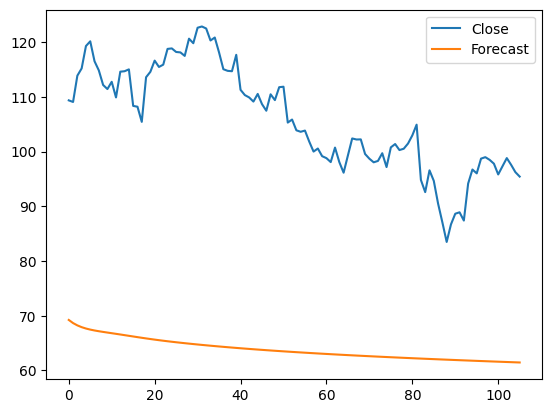

In [147]:
df_JUL_DEC_2019.plot()